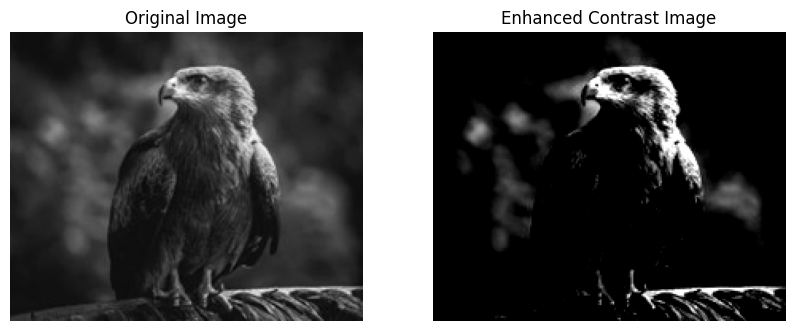

In [15]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

img = cv2.imread('/content/sample_data/Picture1.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Image not found. Please check the file name or path.")
else:
    r1 = 70
    r2 = 180
    s1 = 0
    s2 = 255

    stretched = np.zeros_like(img, dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j]
            if pixel < r1:
                stretched[i, j] = s1
            elif r1 <= pixel <= r2:
                stretched[i, j] = ((pixel - r1) / (r2 - r1)) * (s2 - s1) + s1
            else:
                stretched[i, j] = s2

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Enhanced Contrast Image')
    plt.imshow(stretched, cmap='gray')
    plt.axis('off')

    plt.show()


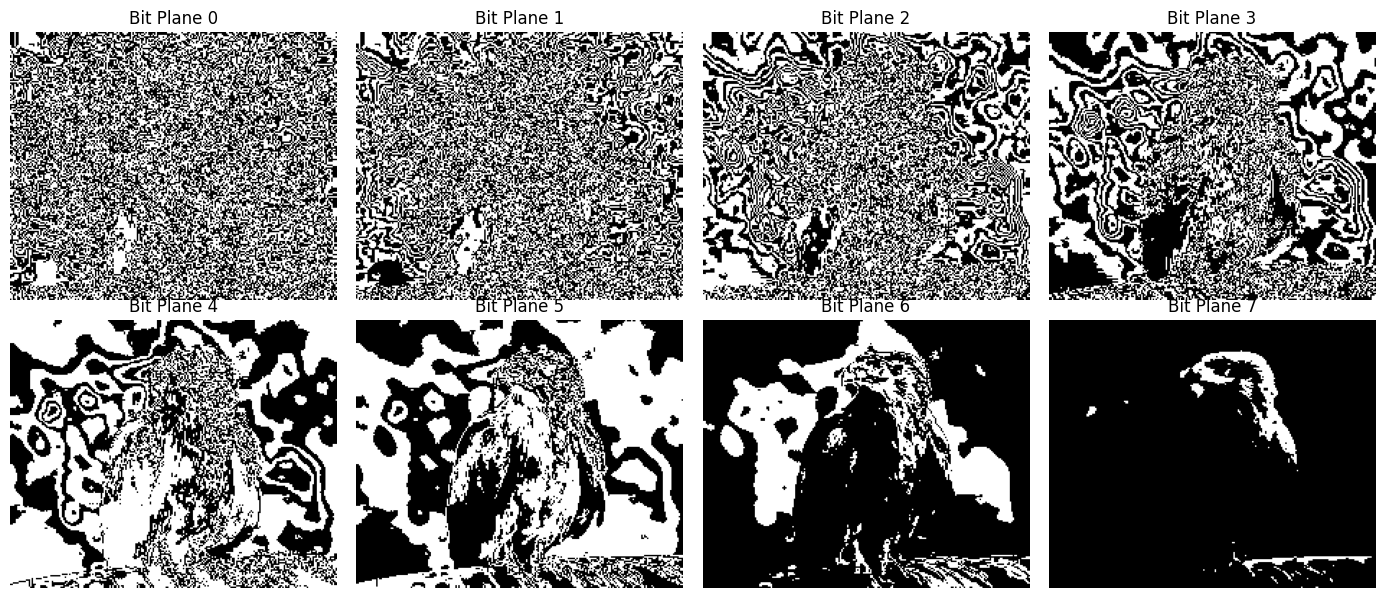

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/sample_data/Picture2.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Image not found.")
else:
    plt.figure(figsize=(14, 6))
    for i in range(8):
        bit_plane = (img >> i) & 1
        bit_plane_img = (bit_plane * 255).astype(np.uint8)
        plt.subplot(2, 4, i+1)
        plt.imshow(bit_plane_img, cmap='gray')
        plt.title(f'Bit Plane {i}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


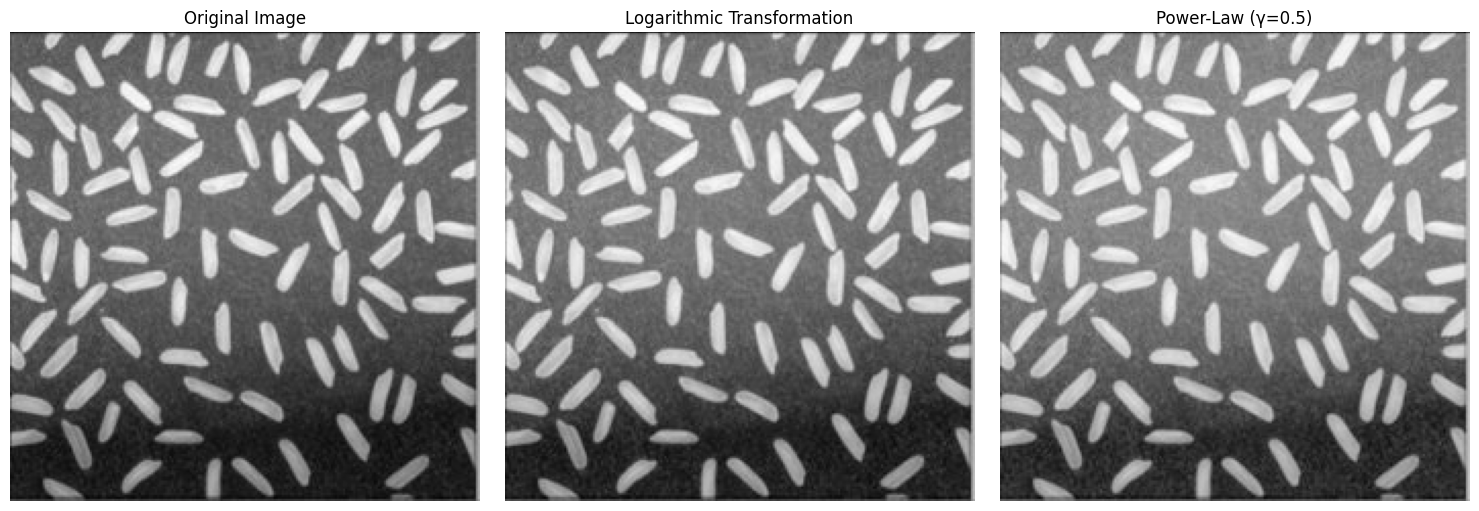

/tmp/ipython-input-10-473832658.py:41: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])
/tmp/ipython-input-10-473832658.py:45: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(log_transformed.ravel(), 256, [0, 256])
/tmp/ipython-input-10-473832658.py:49: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(power_transformed.ravel(), 256, [0, 256])


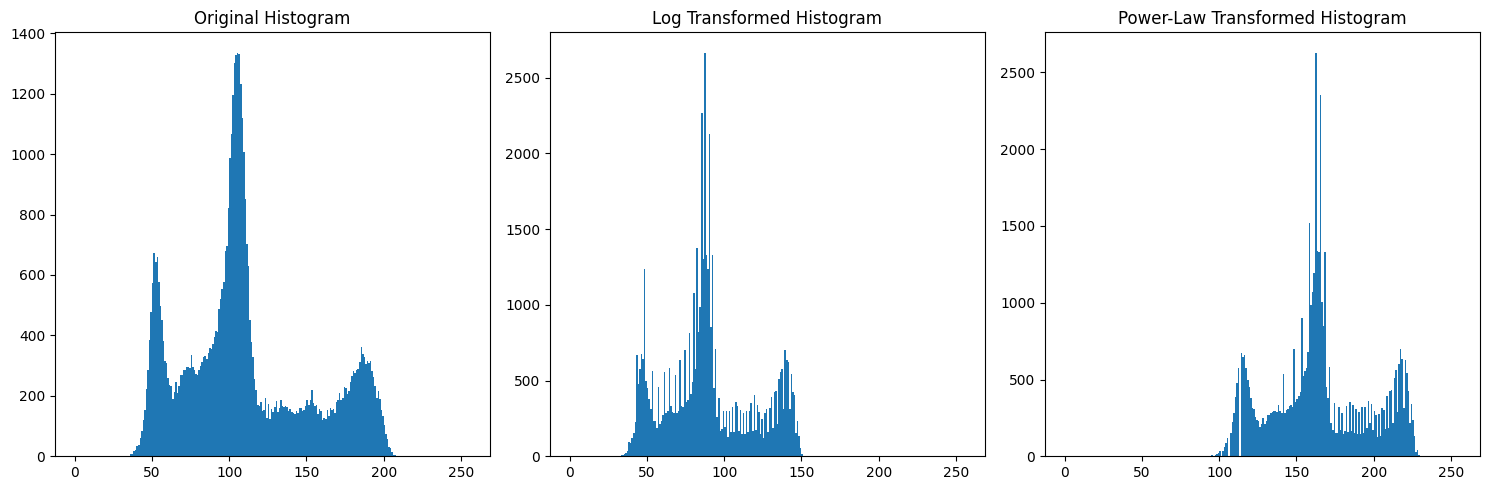

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/sample_data/Picture3.jpg', cv2.IMREAD_GRAYSCALE)

img_normalized = img.astype(np.float32) / 255.0

c = 1.0
log_transformed = c * np.log1p(img_normalized)
log_transformed = np.nan_to_num(log_transformed)
log_transformed = (log_transformed * 255).astype(np.uint8)

gamma = 0.5
power_transformed = np.power(img_normalized, gamma)
power_transformed = (power_transformed * 255).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Logarithmic Transformation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(power_transformed, cmap='gray')
plt.title(f'Power-Law (γ={gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Original Histogram')

plt.subplot(1, 3, 2)
plt.hist(log_transformed.ravel(), 256, [0, 256])
plt.title('Log Transformed Histogram')

plt.subplot(1, 3, 3)
plt.hist(power_transformed.ravel(), 256, [0, 256])
plt.title('Power-Law Transformed Histogram')

plt.tight_layout()
plt.show()

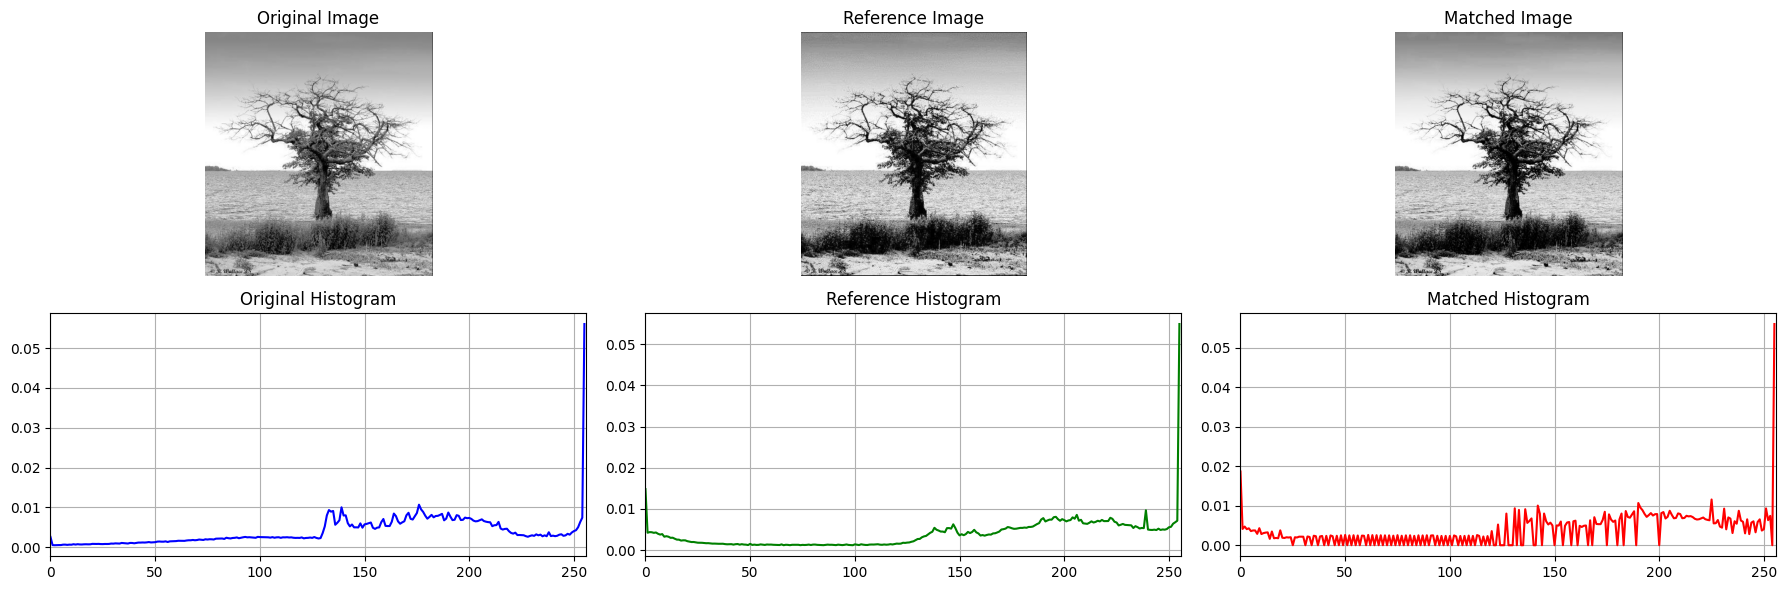

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

try:
    original_img = cv2.imread('/content/p4a.png', cv2.IMREAD_GRAYSCALE)
    reference_img = cv2.imread('/content/p4b.png', cv2.IMREAD_GRAYSCALE)

    if original_img is None or reference_img is None:
        raise FileNotFoundError("Could not load one or both images")
except Exception as e:
    print(f"Error loading images: {e}")
    raise

original_img = original_img.astype(np.float32)
reference_img = reference_img.astype(np.float32)

matched_img = match_histograms(original_img, reference_img)
matched_img = matched_img.astype(np.uint8)
hist_original = cv2.calcHist([original_img.astype(np.uint8)], [0], None, [256], [0, 256])
hist_reference = cv2.calcHist([reference_img.astype(np.uint8)], [0], None, [256], [0, 256])
hist_matched = cv2.calcHist([matched_img], [0], None, [256], [0, 256])

hist_original = hist_original / hist_original.sum()
hist_reference = hist_reference / hist_reference.sum()
hist_matched = hist_matched / hist_matched.sum()

plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.imshow(original_img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(reference_img, cmap='gray', vmin=0, vmax=255)
plt.title('Reference Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(matched_img, cmap='gray', vmin=0, vmax=255)
plt.title('Matched Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.plot(hist_original, color='b')
plt.title('Original Histogram')
plt.xlim([0, 256])
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(hist_reference, color='g')
plt.title('Reference Histogram')
plt.xlim([0, 256])
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(hist_matched, color='r')
plt.title('Matched Histogram')
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()

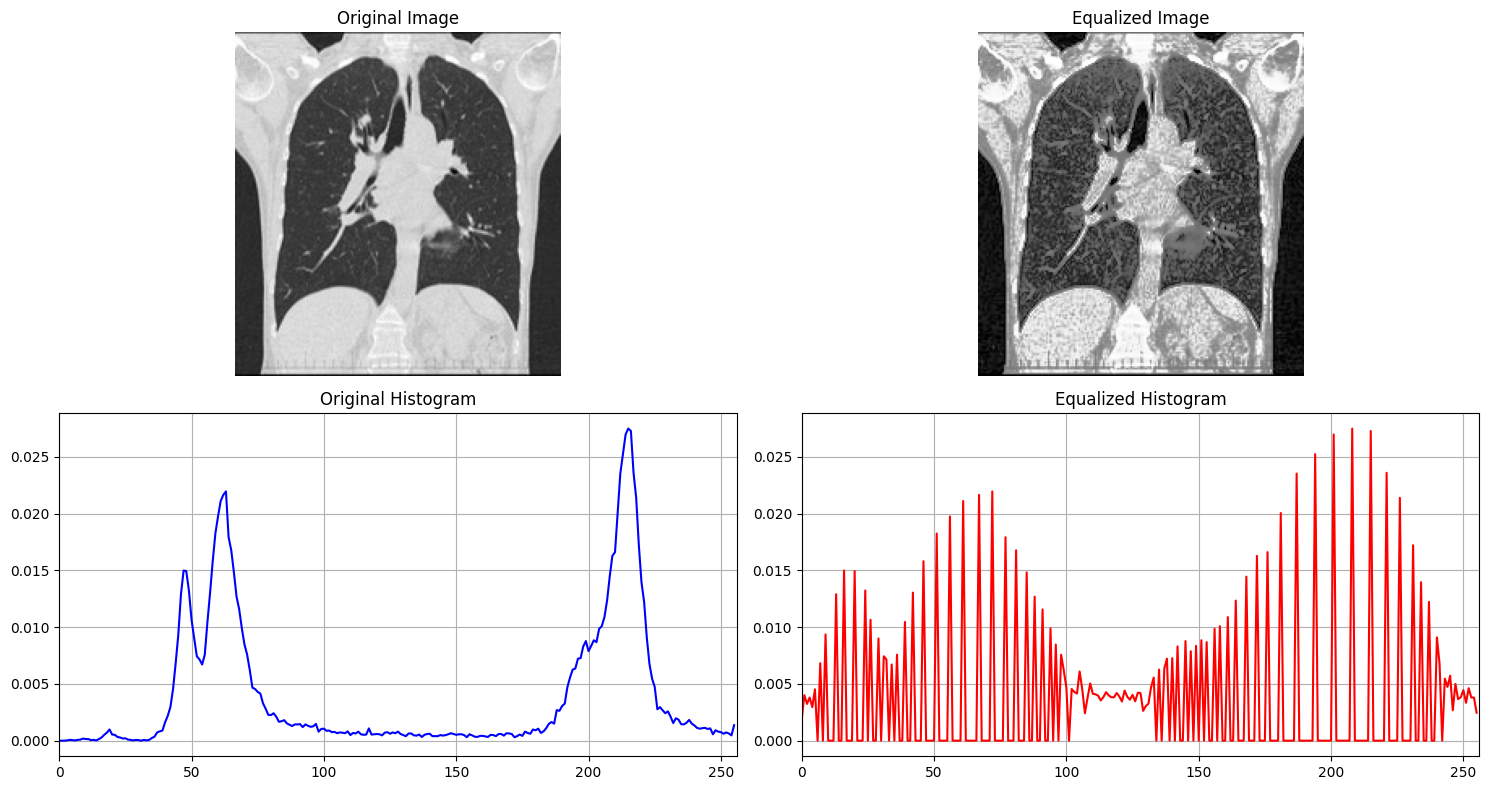

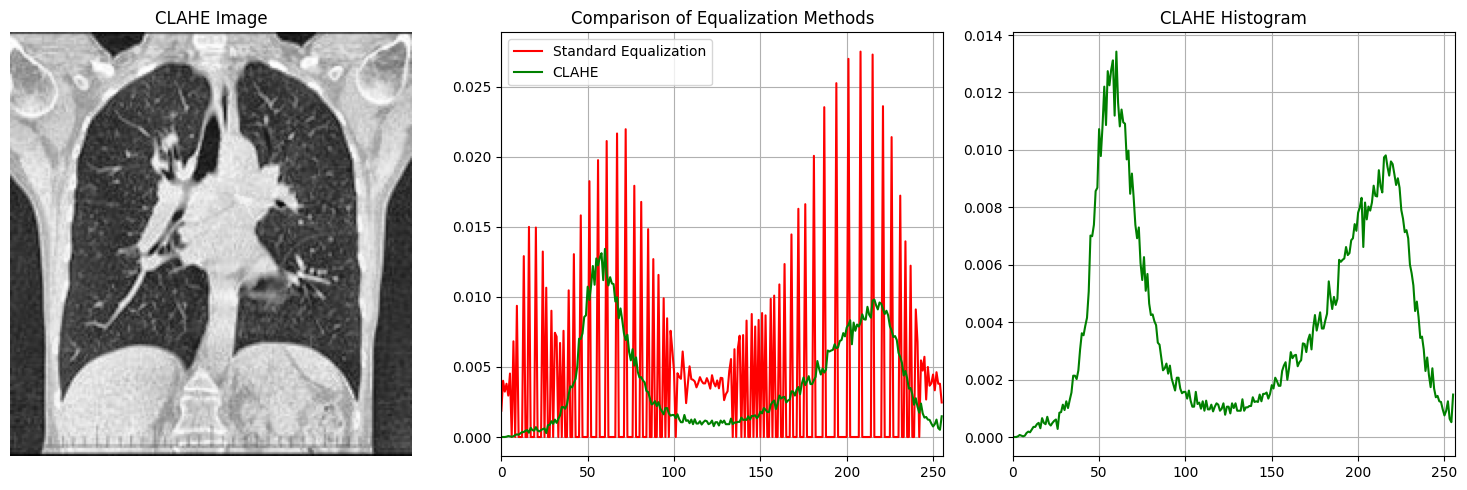

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/sample_data/Picture7.jpg', cv2.IMREAD_GRAYSCALE)

equalized_img = cv2.equalizeHist(img)

hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

hist_original = hist_original / hist_original.sum()
hist_equalized = hist_equalized / hist_equalized.sum()

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(hist_original, color='b')
plt.title('Original Histogram')
plt.xlim([0, 256])
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='r')
plt.title('Equalized Histogram')
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)

hist_clahe = cv2.calcHist([clahe_img], [0], None, [256], [0, 256])
hist_clahe = hist_clahe / hist_clahe.sum()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(hist_equalized, color='r', label='Standard Equalization')
plt.plot(hist_clahe, color='g', label='CLAHE')
plt.title('Comparison of Equalization Methods')
plt.xlim([0, 256])
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(hist_clahe, color='g')
plt.title('CLAHE Histogram')
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()